# DATASET-Devanagri



In [185]:
import pandas as pd
import numpy as np
import scipy.stats as s
import os
import matplotlib.pyplot as plt
import random

# TRAINING DATA

In [186]:
list_of_folder_names = os.listdir("./Train")

In [187]:
list_of_images = []

for each_folder in list_of_folder_names:
    
    base_path = os.path.join("./Train",each_folder)
    
    list_of_images_in_folder = os.listdir(base_path)
    
    list_of_images.extend(map(lambda x: plt.imread(os.path.join(base_path,x)).reshape(1024,),list_of_images_in_folder))

In [188]:
stacked_up_images=np.array(list_of_images)

In [189]:
raw_data=pd.DataFrame(data=stacked_up_images)

In [190]:
labels=[]
for i in range(0,46):
    for j in range(0,1700):
        labels.append(i)
train_labels=np.array(labels)

In [191]:
train_labels=pd.DataFrame(data=train_labels)

In [192]:
train_labels=train_labels.rename(columns={0:'labels'})

In [193]:
data=pd.concat([train_labels,raw_data],axis=1)

# DATA PREPROCESSING

# z normalisation of the data


In [194]:
#computing mean of every column and standard deviation of every column of the dataframe,except data['labels']
raw_data_mean=[]
raw_data_standard_dev=[]
columns=list(raw_data.columns)
for i in columns:
    raw_data_mean.append(raw_data[i].mean())
    raw_data_standard_dev.append(raw_data[i].std())

now we will subtract the mean of every column of the data from every value of the column and divide it with its standard deviation

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes

In [195]:
#here,we will normalize our data to zero mean and one standard deviation
for i in range(len(columns)):
        if (raw_data_standard_dev[i]==0):
            raw_data[i]=raw_data[i]-raw_data_mean[i]
        else:
            raw_data[i]=(raw_data[i]-raw_data_mean[i])/raw_data_standard_dev[i]

In [196]:
#now we will calculate covariance matrix of our dataset
covariance_matrix=raw_data.cov()

In [197]:
#now we will get the determinant to conclude whether the our covariance matrix is singular or not
covariance_mat=np.linalg.det(covariance_matrix)

In [198]:
raw_data=np.array(raw_data)

since in our dataset each class covariance matrix is singular now,we have to reduce the dimensionality of our dataset.we will first use PCA(principal component analysis)

# PCA

STEPS TO REDUCE DIMENSION USING PCA

1.COMPUTE EIGEN VECTOR AND EIGEN VALUES OF THE DATASET FROM COVARIANCE MATRIX.

2.SET VARIANCE YOU WANT IN THE DATASET,RANGE(95%-99%)

3.CREATE A SET OF EIGEN VECTORS WHOSE EIGEN VALUES SUM IS EQUAL TO THE PRESET VARIANCE

4.TAKE A PROJECTION OF THE LOWER DIMENSION DATASET BY TAKING  THE DOT PRODUCT OF THE DATASET WITH THE SELECTED EIGEN VECTOR MATRIX.


In [199]:
#STEP 1. TO COMPUTE EIGEN VALUES AND EIGEN VECTOR WE WILL USE SVD(Singular value decomposition)
eigen_vector,eigen_value,eigen_vector_transpose=np.linalg.svd(covariance_matrix.T)

In [200]:
#sort the eigen vector and eigen value in the descending order
#for sorting we are using quick sort,since quick sort will sort the array in ascending order we will reverse the solution
#since we are using singular value decomposition there is no need to use this step,use when you are using different technique for getting eigen value and eigen vector
sorted_eigen_vector=np.sort(eigen_vector,axis=0)
sorted_eigen_value=np.sort(eigen_value)
sorted_eigen_vector=sorted_eigen_vector[::-1]
sorted_eigen_value=sorted_eigen_value[::-1]



In [201]:
#STEP 2. WE WILL HAVE VARIANCE OF 98%
#STEP 3. WE WILL COMPUTE THE INDICES OF ALL EIGEN VECTOR BY WHICH OUR VARIANCE IS EQUAL TO 98%
principal_components=[]
total=np.sum(eigen_value)
current_sum=0
variance_to_preserve=0.95
for i in range(1024):
    current_sum+=eigen_value[i]
    if((current_sum/total)>variance_to_preserve):
        break
    principal_components.append(eigen_vector[:,i])

In [202]:
#these are those eigen vectors which contribute to the 99% of the variance of the dataset.
important_eigen_vectors=np.array(principal_components)

In [203]:
len(important_eigen_vectors)

176

the length function used on the calculated eigen vectors from the pca tells us that 297 eigen_vectors out of 1024 are having 98 percent variance of the total dataset.

In [204]:
#we will now project the lower dimensions of this dataset via multiplying the dataset with eigen vectors we computed above having 99% of the variance.
new_data=np.matmul(raw_data,important_eigen_vectors.T)

In [205]:
#calculating the covariance of the new dataset for each classes.
cov_mats_reduced_of_each_class=[]
for i in range(46):
    cov_mats_reduced_of_each_class.append(np.cov(new_data[i*1700:(i+1)*1700,:],rowvar=False))


In [206]:
#determinant of the new dataset for each class
det=[]
for i in range(46):
    det.append(np.linalg.det(cov_mats_reduced_of_each_class[i]))


In [207]:
#lower dimension dataset.
new_data=pd.DataFrame(data=new_data)

In [208]:
for i in range(46):
    print(det[i])

2.5640185008450732e-18
8.654291141342076e-41
1.305518935938091e-22
6.464013355866216e-07
6.1027736945268056e-12
8.548559459699292e-37
3.6274119488700503e-32
0.007514318040110594
0.005070764921076129
0.2113037742971078
38459357108.19755
1.1805354480000728e-09
1.2316805057881195e-33
2.1654186995420285e-14
13842554.692840362
49610.88425261246
3.7258654208049236
0.0008877252609753707
1.2194783883168964e-17
1.1334436698338195e-17
2.0691707173110097e-06
1.2678319382262072e+23
3.168962930203871e-07
3.3867966944732225e-16
1271051165826.3208
393782.61621100793
137759.80419622647
7.350621142258906e-13
638.8597673807287
3.0168633359851015e-28
0.7375054655418537
383740519.479943
9.769038565292057e-18
7.159134923176599e+18
1.464977002895613e-16
4.265601371581434e+17
7.551209665028526e-113
9.255982947893808e-73
6.919918575701085e-34
3.4183037434039085e-16
2.3934318068449443e-39
2.79921767300014e-26
2.5091378281528105e-09
2.7945312354911258e-36
3.536671042952938e-64
7.250260771267939e-41


since our new dataset's covariance is still very zero,hence we will use regularized discriminant analysis

# RDA 

In [209]:
#calculating the covariance of each class in the pca transform dataset.
cov_m=[]
for i in range(46):
    cov_m.append(new_data.iloc[i*1700:(i+1)*1700].cov())

In [210]:
#calculating pooled covariance matrix.
pool=0
for i in cov_m:
    pool=pool+1699*i
pool=pool/(78200-46)

In [211]:
#calculating sigma 
sigma=np.trace(pool)/pool.shape[0]
sigma

3.5501646277296772

In [212]:
def rda(cov_m,pool,sigma):
    #using the maximum alpha and gamma value obtained above to get the optimum rda covariance matrix for our dataset. 
    alpha=np.random.uniform(0,1)
    gamma=np.random.uniform(0,1)
    final_cov_rda=[]
    for i in cov_m:
          final_cov_rda.append((alpha*i)+(1-alpha)*pool)
    #using the optimum rda covariance matrix to get the modified rda covariance matrix
    final_mod_rda=[]
    for i in final_cov_rda:
        final_mod_rda.append(((1-gamma)*i)+(gamma*sigma*np.identity(cov_m[0].shape[0])))
    return final_mod_rda,alpha,gamma

In [213]:
def mean(data):
    #calculating mean of each class of the pca transformed data ie.(new data)
    mean_rda=[]
    for i in range(46):
        mean_rda.append(new_data.iloc[i*1700:(i+1)*1700].mean())
    return mean_rda

In [214]:
def posterior_probab(data,rda):
    #calculating posterior probablity using probablity distribution function of the normal distribution,as we assume our data is coming from gauusian distribution.
    #this will give us likelihood probablity but we maximize the likelihood probability by using -log hence getting posterior probability.
    mean_rda1=mean(new_data)
    posterior_train_probabilities=[]
    for i in range(46):
        posterior_train_probabilities.append(-np.log(s.multivariate_normal.pdf(data,mean_rda1[i],rda[i])))
    return posterior_train_probabilities

In [215]:
def predictions_cal(posterior_train_probabilities):
    #there are 46 arrays in the likelihood probabilities each representing a class
    #each array has 78200 probabilities that signifies the probabilities of each image
    ans_train=[]
    for i in range(78200):
        m=[]
        for j in range(46):
            m.append((posterior_train_probabilities[j][i],j))
        ans_train.append(min(m))
    return ans_train

In [216]:
def best():
    accuracy=[]
    alphalist=[]
    gammalist=[]
    for i in range(20):
        final_mod_rda,alpha,gamma=rda(cov_m,pool,sigma)
        posterior_train_probabilities=posterior_probab(new_data,final_mod_rda)
        ans_train=predictions_cal(posterior_train_probabilities)
        predicted_labels=[]
        for j in range(78200):
            predicted_labels.append(ans_train[j][1])
        predicted_labels=np.array(predicted_labels).reshape(78200,1)
        boolean_mask=(predicted_labels == train_labels)
        accuracy.append((np.count_nonzero(boolean_mask)/78200)*100)
        alphalist.append(alpha)
        gammalist.append(gamma)
    ind=np.argmax(accuracy)
    best_accuracy=accuracy[ind]
    best_alpha=alphalist[ind]
    best_gamma=gammalist[ind]
    
    return best_accuracy,best_alpha,best_gamma
        

In [217]:
accuracy,alpha,gamma=best()

In [219]:
accuracy

94.1304347826087

In [220]:
def final_rda(cov_m,pool,sigma,alpha,gamma):
    best_rda=[]
    for i in cov_m:
          best_rda.append((alpha*i)+(1-alpha)*pool)
    #using the optimum rda covariance matrix to get the modified rda covariance matrix
    best_rda_dash=[]
    for i in best_rda:
        best_rda_dash.append(((1-gamma)*i)+(gamma*sigma*np.identity(cov_m[0].shape[0])))
    return best_rda_dash
    

In [221]:
rda_final=final_rda(cov_m,pool,sigma,alpha,gamma)

# testing data

In [222]:
list_of_testing_folder_names = os.listdir("./Test/")

In [223]:
list_of_testing_images = []

for each_folder in list_of_testing_folder_names:
    
    base_path = os.path.join("./Test/",each_folder)
    
    list_of_testing_images_in_folder = os.listdir(base_path)
    
    list_of_testing_images.extend(map(lambda x: plt.imread(os.path.join(base_path,x)).reshape(1024,),list_of_testing_images_in_folder))

In [224]:
testing_stacked_up_images=np.array(list_of_testing_images)

In [225]:
testing_raw_data=pd.DataFrame(data=testing_stacked_up_images)

In [227]:
testing_raw_data.shape[0]

13785

# normalizing the data

In [228]:
for i in range(len(columns)):
        if (raw_data_standard_dev[i]==0):
            testing_raw_data[i]=testing_raw_data[i]-raw_data_mean[i]
        else:
            testing_raw_data[i]=(testing_raw_data[i]-raw_data_mean[i])/raw_data_standard_dev[i]

In [229]:
#now we will use the above pca computed eigen vectors to project the lower dimension of the testing dataset.
new_testing_data=testing_raw_data.dot(important_eigen_vectors.T)

# PCA Transform data

In [230]:
#computing the mean of each class of the new_testing_data.
pca_transform_data_mean=[]
for i in range(46):
    pca_transform_data_mean.append(new_testing_data.iloc[i*300:(i+1)*300].mean())

# Prediction on testing data

In [231]:
#calculating posterior probability of the testing dataset
testing_posterior_probability=[]
for i in range(46):
    testing_posterior_probability.append(-np.log(s.multivariate_normal.pdf(new_testing_data,pca_transform_data_mean[i],rda_final[i])))

In [232]:
#there are 46 arrays in the likelihood probabilities each representing a class
#each array has 78200 probabilities that signifies the probabilities of each image
ans_test=[]
for i in range(new_testing_data.shape[0]):
    n=[]
    for j in range(46):
        n.append((testing_posterior_probability[j][i],j))
    ans_test.append(min(n))

In [233]:
predicted_test_labels=[]
for i in range(new_testing_data.shape[0]):
    predicted_test_labels.append(ans_test[i][1])

In [243]:
predicted_test_labels=np.array(predicted_test_labels)

In [246]:
predicted_test_labels=predicted_test_labels.reshape(13785,)

In [248]:
listi_test=[]
for i in range(0,46):
    for j in range(0,300):
        listi_test.append(i)
test_labels=np.array(listi_test)

In [249]:
test_labels=test_labels[0:13785]


In [250]:
test_labels.shape

(13785,)

In [251]:
boolean_mask_test=np.count_nonzero(predicted_test_labels == test_labels)

In [252]:
boolean_mask_test

12024

# classification accuracy
AC=TN+TP/TN+FP+FN+TP

In [253]:
#Accuracy-proportion or percentage of correctly predicted labels over all predictions
accuracy=(boolean_mask_test/new_testing_data.shape[0])*100
print(accuracy)

87.22524483133841


In [160]:
list_of_testing_images1 = []

for each_folder in list_of_testing_folder_names:
    
    base_path = os.path.join("./Test/",each_folder)
    
    list_of_testing_images_in_folder = os.listdir(base_path)
    
    list_of_testing_images1.extend(map(lambda x: plt.imread(os.path.join(base_path,x)),list_of_testing_images_in_folder))

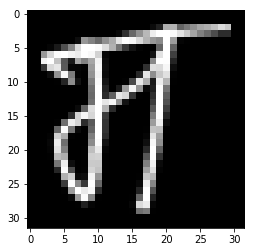

In [254]:
plt.imshow(list_of_testing_images1[4852],cmap='gray')

In [255]:
predicted_test_labels[4852],test_labels[4852]

(16, 16)

In [256]:
train_labels.shape

(78200, 1)